In [280]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline


In [281]:
dataset = pd.read_csv('/Users/kathiateran/Documents/Machine Learning/A1. FINAL/final_bonus.csv', sep=',')
dataset

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-11.82,-13.29,-19.32,-26.28,-38.14,-50.09,-59.78,-75.04,-85.63,-104.66,0
1,-11.54,-14.18,-25.35,-32.75,-48.77,-60.08,-75.41,-89.72,-104.25,-121.90,0
2,-12.45,-15.81,-33.33,-40.64,-61.50,-72.12,-91.75,-104.67,-124.21,-139.76,0
3,-14.67,-18.49,-40.56,-47.67,-72.11,-82.19,-106.26,-118.26,-141.95,-155.84,0
4,-18.07,-19.74,-47.08,-53.50,-81.15,-89.81,-117.91,-128.10,-156.66,-168.72,0
...,...,...,...,...,...,...,...,...,...,...,...
120,-66.05,-55.55,-136.84,-112.44,-211.41,-176.55,-300.14,-252.75,-417.08,-353.50,4
121,-73.04,-60.95,-141.43,-116.96,-217.81,-183.10,-309.05,-261.66,-429.28,-365.93,4
122,-76.09,-63.93,-143.70,-119.61,-221.81,-187.00,-313.96,-266.76,-436.02,-372.47,4
123,-78.81,-65.68,-146.01,-121.49,-223.79,-189.51,-319.61,-271.93,-439.91,-376.66,4


In [282]:
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values

In [283]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The 10 most significant features are:

 0.7910828010516047 1.0 0.6008128179935973 0.6902062425439259 0.4962726276805533 0.5336396751236808 0.4718288588956607 0.48364608528754766 0.45955982092279546 0.46233693132963566


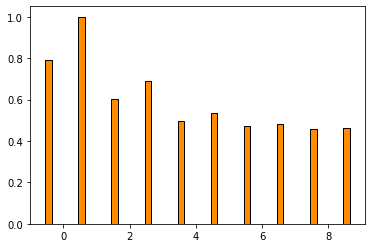

In [284]:
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the 10
# most significant features
X_indices = np.arange(X.shape[-1])

selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

scorelist = []
scorelist.append(scores)

for elem in scorelist:
    print ('The 10 most significant features are:\n\n', *elem)

In [285]:
from sklearn import metrics
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from fcmeans import FCM
from sklearn import model_selection


# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear', C=1.0, gamma='auto')
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features:\n', '{:.2%}'.format(clf.score(X_test, y_test)))


svm = make_pipeline(SelectKBest(f_classif, k=10), svm.SVC(kernel='linear', C=1.0, gamma='auto'))

svm_fit = svm.fit(X_train, y_train)
pred_test_svm = svm.predict(X_test)


print('\nPrediction accuracy for SVM:')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_svm)))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, pred_test_svm))

cm=confusion_matrix(y_test, pred_test_svm)

print("\n")
        
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
ACC = (TP+TN)/(TP+FP+FN+TN)
        
print("Accuracy", ACC)
print("True Positive Rate", TPR)
print("Specificity", TNR)
print("False Positive Rate", FPR)
print("False Negative Rate", FNR) 
print("\n")  

ACCavg = np.mean(ACC)
TPRavg = np.mean(TPR)
TNRavg = np.mean(TNR)
FPRavg = np.mean(FPR)
FNRavg = np.mean(FNR)
            
print("Average Accuracy", '{:.2%}'.format(ACCavg))
print("Average True Positive Rate", '{:.2%}'.format(TPRavg))
print("Average Specificity", '{:.2%}'.format(TNRavg))
print("Average False Positive Rate", '{:.2%}'.format(FPRavg))
print("Average False Negative Rate", '{:.2%}'.format(FNRavg))
print("\n")

Classification accuracy without selecting features:
 80.00%

Prediction accuracy for SVM:
80.00%

Confusion Matrix
[[7 0 0 0 0]
 [0 3 0 0 0]
 [0 2 4 0 0]
 [0 3 0 1 0]
 [0 0 0 0 5]]


Accuracy [1.   0.8  0.92 0.88 1.  ]
True Positive Rate [1.         1.         0.66666667 0.25       1.        ]
Specificity [1.         0.77272727 1.         1.         1.        ]
False Positive Rate [0.         0.22727273 0.         0.         0.        ]
False Negative Rate [0.         0.         0.33333333 0.75       0.        ]


Average Accuracy 92.00%
Average True Positive Rate 78.33%
Average Specificity 95.45%
Average False Positive Rate 4.55%
Average False Negative Rate 21.67%




In [286]:
# Compare to the weights of an Knn

knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

knn_clf.fit(X_train, y_train)
print('Classification accuracy without selecting features:\n', '{:.2%}'.format(knn_clf.score(X_test, y_test)))


knn = make_pipeline(SelectKBest(f_classif, k=10), MinMaxScaler(), KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))

knn_fit = knn.fit(X_train, y_train)
pred_test_knn = knn.predict(X_test)

print('Prediction accuracy for KNN')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_knn)))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, pred_test_hmm))

cm=confusion_matrix(y_test, pred_test_knn)

print("\n")
        
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
ACC = (TP+TN)/(TP+FP+FN+TN)
        
print("Accuracy", ACC)
print("True Positive Rate", TPR)
print("Specificity", TNR)
print("False Positive Rate", FPR)
print("False Negative Rate", FNR) 
print("\n")  

ACCavg = np.mean(ACC)
TPRavg = np.mean(TPR)
TNRavg = np.mean(TNR)
FPRavg = np.mean(FPR)
FNRavg = np.mean(FNR)
            
print("Average Accuracy", '{:.2%}'.format(ACCavg))
print("Average True Positive Rate", '{:.2%}'.format(TPRavg))
print("Average Specificity", '{:.2%}'.format(TNRavg))
print("Average False Positive Rate", '{:.2%}'.format(FPRavg))
print("Average False Negative Rate", '{:.2%}'.format(FNRavg))
print("\n")

Classification accuracy without selecting features:
 76.00%
Prediction accuracy for KNN
76.00%

Confusion Matrix
[[0 0 2 0 5]
 [0 0 2 1 0]
 [0 2 0 4 0]
 [2 0 0 1 1]
 [0 0 4 1 0]]


Accuracy [1.   1.   0.76 0.88 0.88]
True Positive Rate [1.   1.   1.   0.25 0.4 ]
Specificity [1.         1.         0.68421053 1.         1.        ]
False Positive Rate [0.         0.         0.31578947 0.         0.        ]
False Negative Rate [0.   0.   0.   0.75 0.6 ]


Average Accuracy 90.40%
Average True Positive Rate 73.00%
Average Specificity 93.68%
Average False Positive Rate 6.32%
Average False Negative Rate 27.00%


